UNIT 2 CHALLENGE - 8/18/18

In [4]:
#Import pandas, numpy, matplotlib, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('data.csv')
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [26]:
#creating a new dataframe to find mean tempos
mean_tempo = df.groupby('label')['tempo'].mean()
mean_tempo.head()

label
blues        120.742207
classical    127.032280
country      110.858840
disco        120.341798
hiphop       113.976295
Name: tempo, dtype: float64

Text(0,0.5,'Mean Tempo')

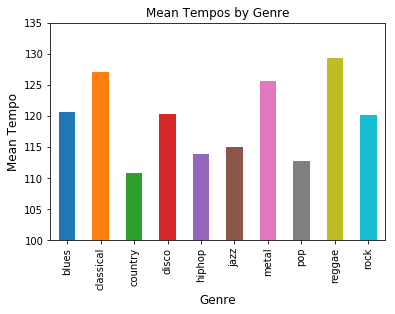

In [7]:
#Plotting mean tempos by genre

mean_tempo.plot.bar(title = 'Mean Tempos by Genre')
plt.ylim([100, 135])
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Mean Tempo', fontsize=12)

This shows the mean tempos by genre. Mean tempos for all genres fell within a range of 112 to 130. Country's tempo was the slowest at 110.86, whereas Reggae's tempo was the fastest at 129.36.

In [27]:
#creating a new dataframe to find mean beats
mean_beats = df.groupby('label')['beats'].mean()
mean_beats.head()

label
blues        57.74
classical    57.12
country      53.51
disco        58.10
hiphop       55.01
Name: beats, dtype: float64

Text(0,0.5,'Mean Beats')

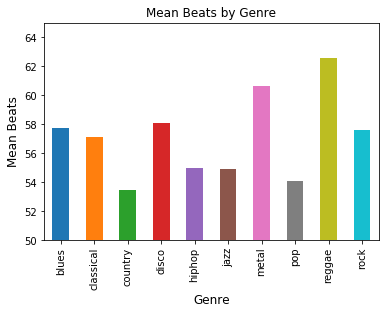

In [9]:
#Plotting mean tempos by genre

mean_beats.plot.bar(title = 'Mean Beats by Genre')
plt.ylim([50, 65])
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Mean Beats', fontsize=12)

This shows the mean beats by genre. Mean tempos for all genres fell within a range of 53 to 63. Country's had the lowest mean amount of beats at 53.5 while reggae had the most at 62.5

In [34]:
#create a new dataframe exploring tempo, beats, and genre
beattemp = df[['tempo', 'beats', 'label']]

beattemp.head()

,tempo,beats,label
0,103.359375,50,blues
1,95.703125,44,blues
2,151.999081,75,blues
3,184.570312,91,blues
4,161.499023,74,blues


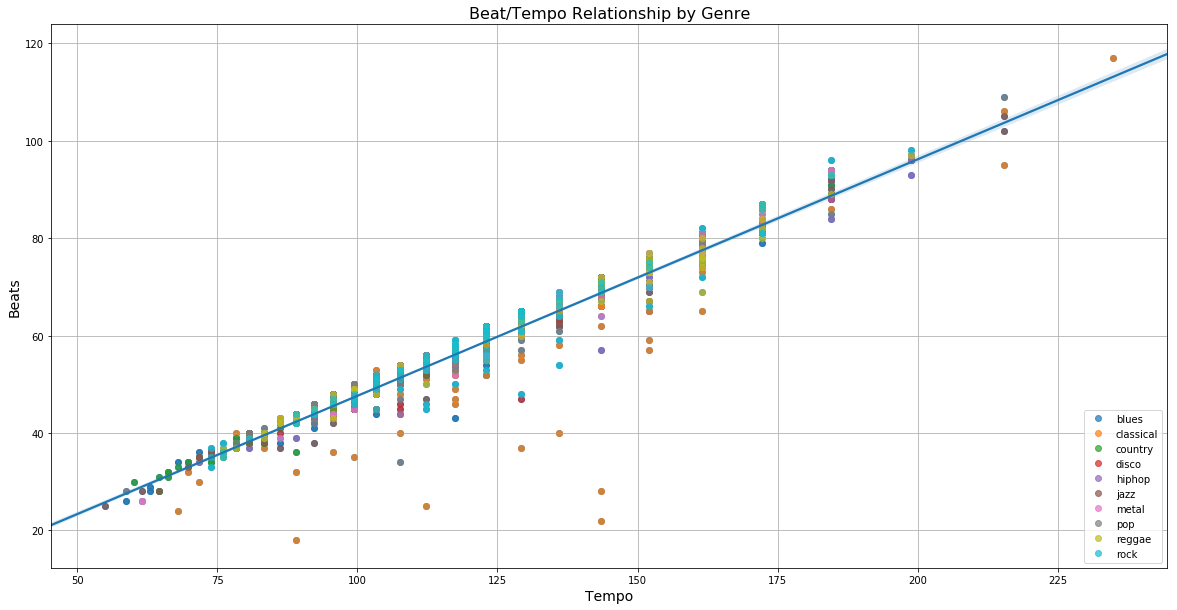

In [38]:
#groups tempo and beat by label
types = beattemp.groupby('label')

#increases the size of the plot
fig,ax = plt.subplots(figsize=(20,10))

#creates a loop to pull tempo and beats by label and plot them
for name, type in types:
    ax.plot(type.tempo, type.beats, marker = 'o', linestyle='', label = name, alpha = 0.7)

#creates line of best fit for (tempo, beats)
sns.regplot(df.tempo,df.beats)

#places legend in the lower right corner
ax.legend(loc='lower right')

#labels the graph
plt.xlabel('Tempo', fontsize=14)
plt.ylabel ('Beats', fontsize=14)
plt.title('Beat/Tempo Relationship by Genre', fontsize=16)

#adds grid lines
plt.grid(True)

plt.show()

This shows a positive association across tempo and beat. The line of best fit shows this trend. Outliers are disproportionately in the classical genre, indicating that classical music does not necessarily follow this trend.